## Principle Component Analysis
This notebook will implement Principle Component Analysis with the [Iris](dataset/IRIS.csv) dataset.

In [11]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#regression algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 1. Load the Iris dataset
df = pd.read_csv("/Users/vinodk/Documents/Rice Univeristy/4th semster/Data Science and ML /INDE 577 Repository/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/Unsupervised Learning/4_Principal Component Analysis/Dataset/IRIS.csv")
print(df.info())
# check for null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
#Features are all numeric columns
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# Target is the 'species' column
df['target'] = df['species']  # this is categorical, so it shouldn't be used in numeric operations
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical target to numeric
label_encoder = LabelEncoder()
df['target_numeric'] = label_encoder.fit_transform(df['species'])

# Split the normalized features and target for training and testing
X_train, X_test, y_train, y_test = train_test_split(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['target_numeric'], test_size=0.2, random_state=42)


In [7]:
print(df.info())     # Get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal_length    150 non-null    float64
 1   sepal_width     150 non-null    float64
 2   petal_length    150 non-null    float64
 3   petal_width     150 non-null    float64
 4   species         150 non-null    object 
 5   target          150 non-null    object 
 6   target_numeric  150 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 8.3+ KB
None


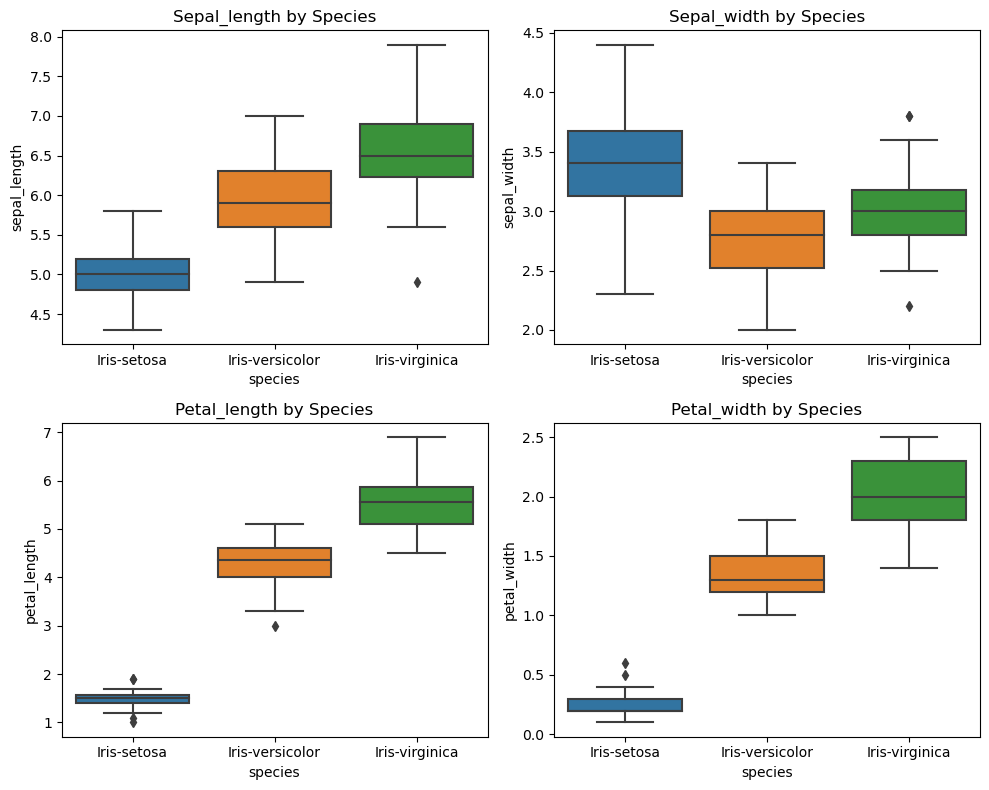

In [8]:
# Create box plots for each feature grouped by 'species'
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Loop over the features to create box plots
for i, feature in enumerate(features):
    sns.boxplot(x='species', y=feature, data=df, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(f'{feature.capitalize()} by Species')

plt.tight_layout()
plt.show()


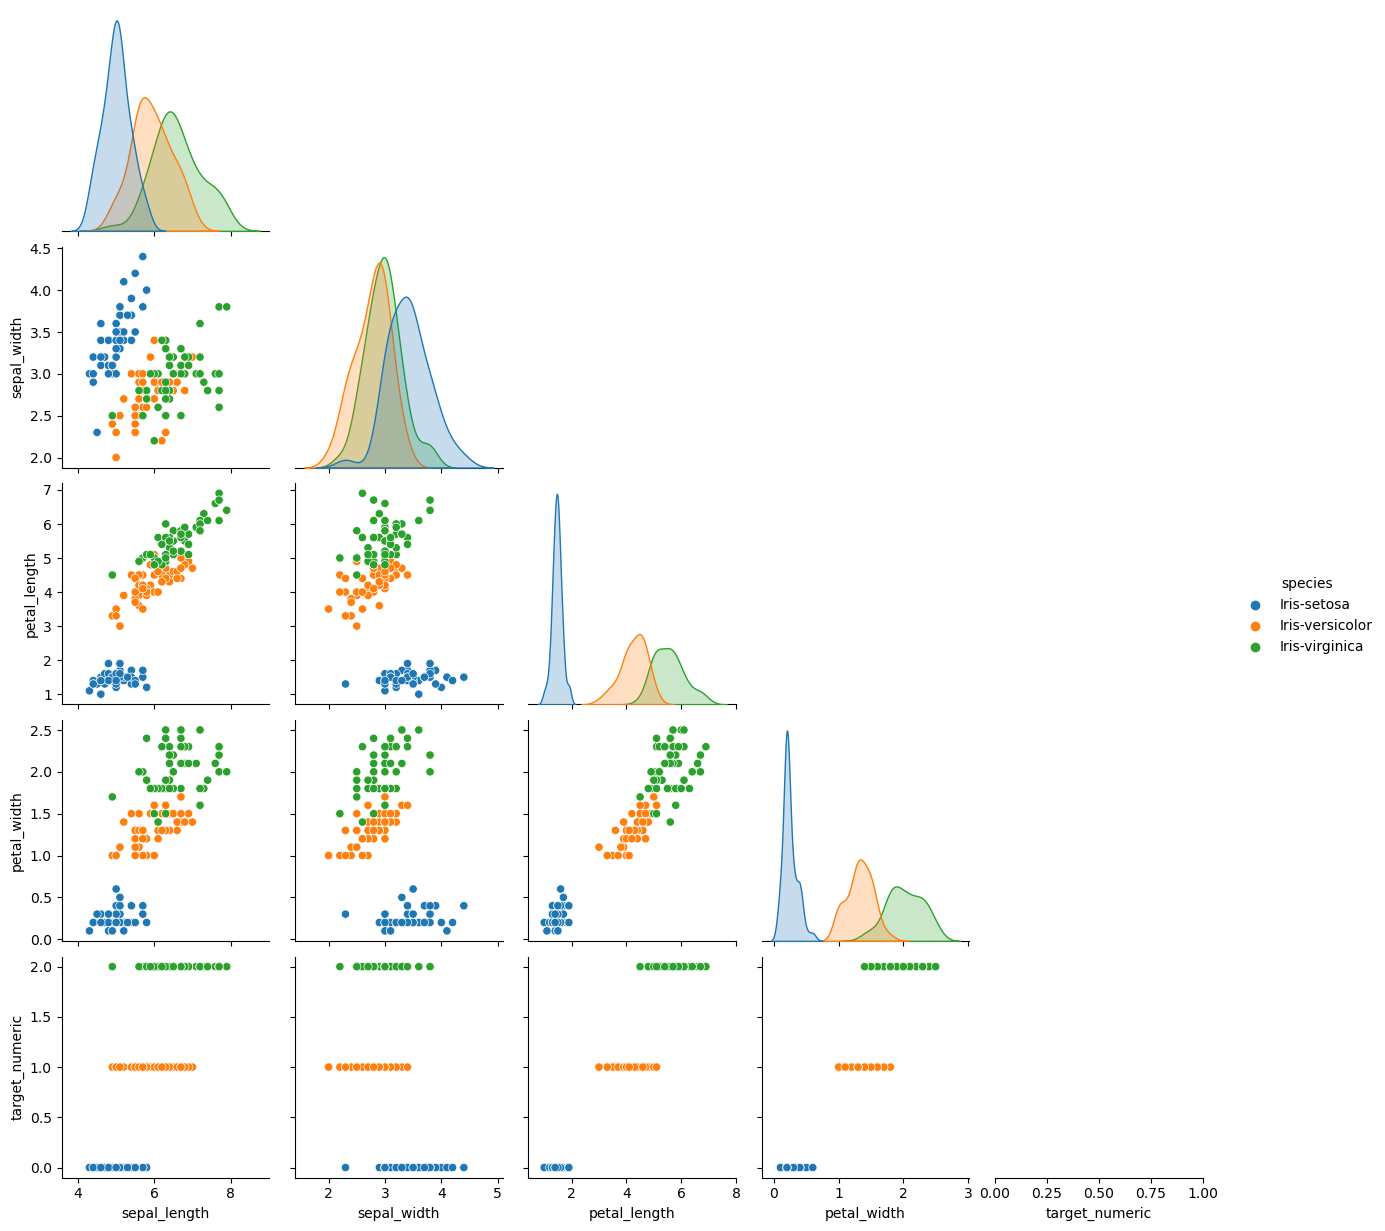

In [9]:
# Create a pair plot to visualize relationships among features and target variable
sns.pairplot(df, hue='species', diag_kind='kde', corner=True)
plt.show()


In [12]:
#Load Models

# Initialize logistic regression model
lr = LogisticRegression()
# Fit the model on the training set
lr.fit(X_train, y_train)


LogisticRegression()

In [13]:
# Initialize PCA (without specifying the number of components)
pca = PCA()

# Apply PCA to training and test sets
X_train_pca = pca.fit_transform(X_train)  # Fit and transform the training set with PCA
X_test_pca = pca.transform(X_test)  # Transform the test set with PCA


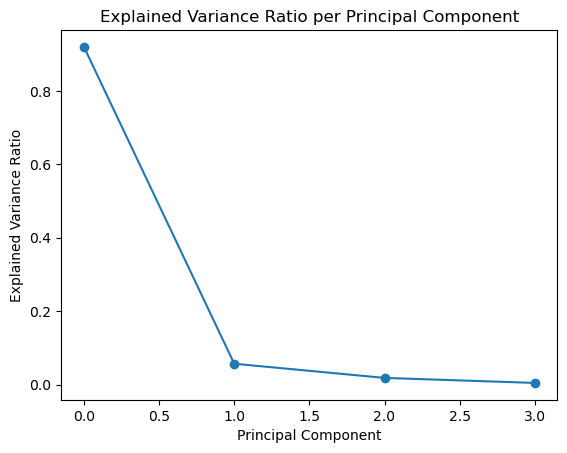

In [14]:
# Plot the explained variance ratio for each principal component
plt.plot(pca.explained_variance_ratio_, marker='o')  # Use markers for clarity
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy * 100, '%')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 100.0 %
Precision: 1.0
Recall: 1.0
F1 score: 1.0
